# Multivariate analysis
In this part we are going to analyze the data obtain and perform some multivariate analysis for instance PCA and clustering methods.
#### PCI analysis

#### Clustering K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #for clusterization
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #to manage performance of our models

In [2]:
data_a = pd.read_csv('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/processed/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [12]:
data_a.shape

(5798, 882)

## PCA analysis

In [35]:
# distributing the dataset into two components X and Y
X = data_a.iloc[:, 0:881].values
y = data_a.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

In [39]:
principal_Df = pd.DataFrame(data = X_train
             , columns = ['principal component 1', 'principal component 2'])

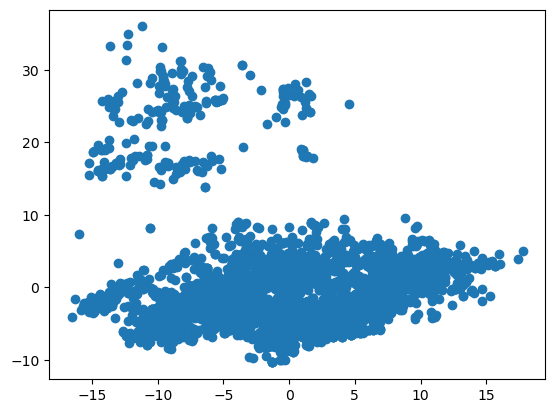

In [45]:
plt.figure()
plt.scatter(principal_Df['principal component 1'], principal_Df['principal component 2'])

<Figure size 640x480 with 0 Axes>

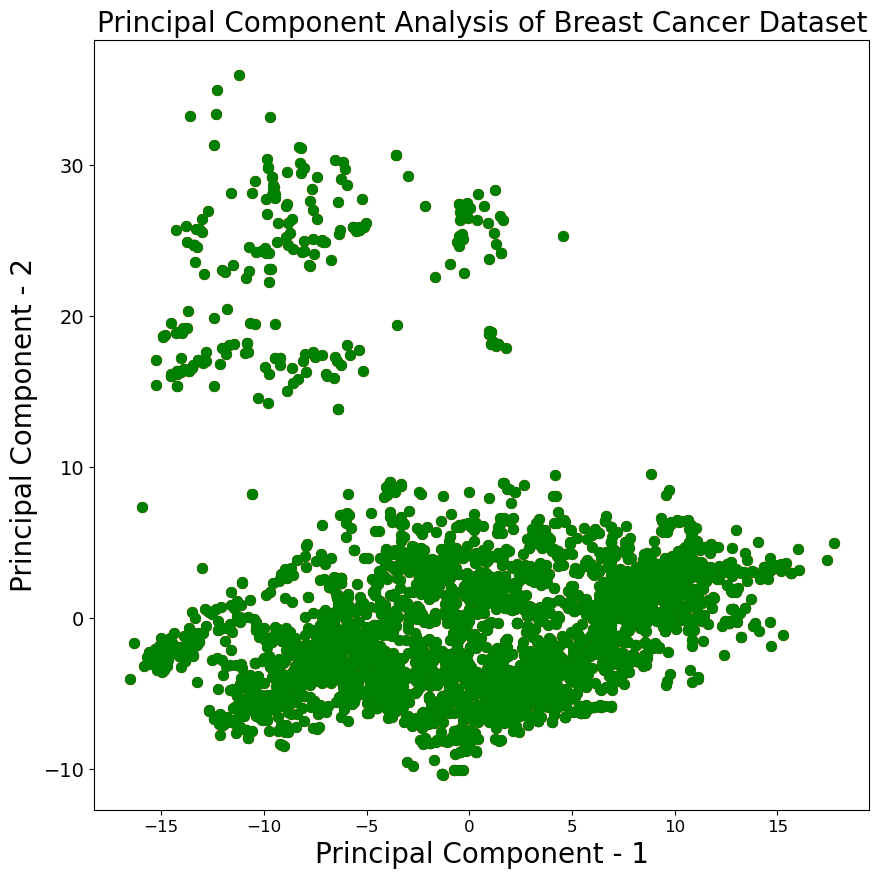

In [47]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

colors = ['r', 'g']
for color in zip(colors):
    plt.scatter(principal_Df['principal component 1']
               , principal_Df['principal component 2'], c = color, s = 50)

#plt.legend(targets,prop={'size': 15})

# Clustering analysis

In [3]:
from sklearn.feature_selection import VarianceThreshold

X = data_a.drop('pIC50', axis=1)
X

selection = VarianceThreshold(threshold=(.8 *( 1 - .8)))
X = selection.fit_transform(X)

In [4]:
X.shape #remove columns

(5798, 144)

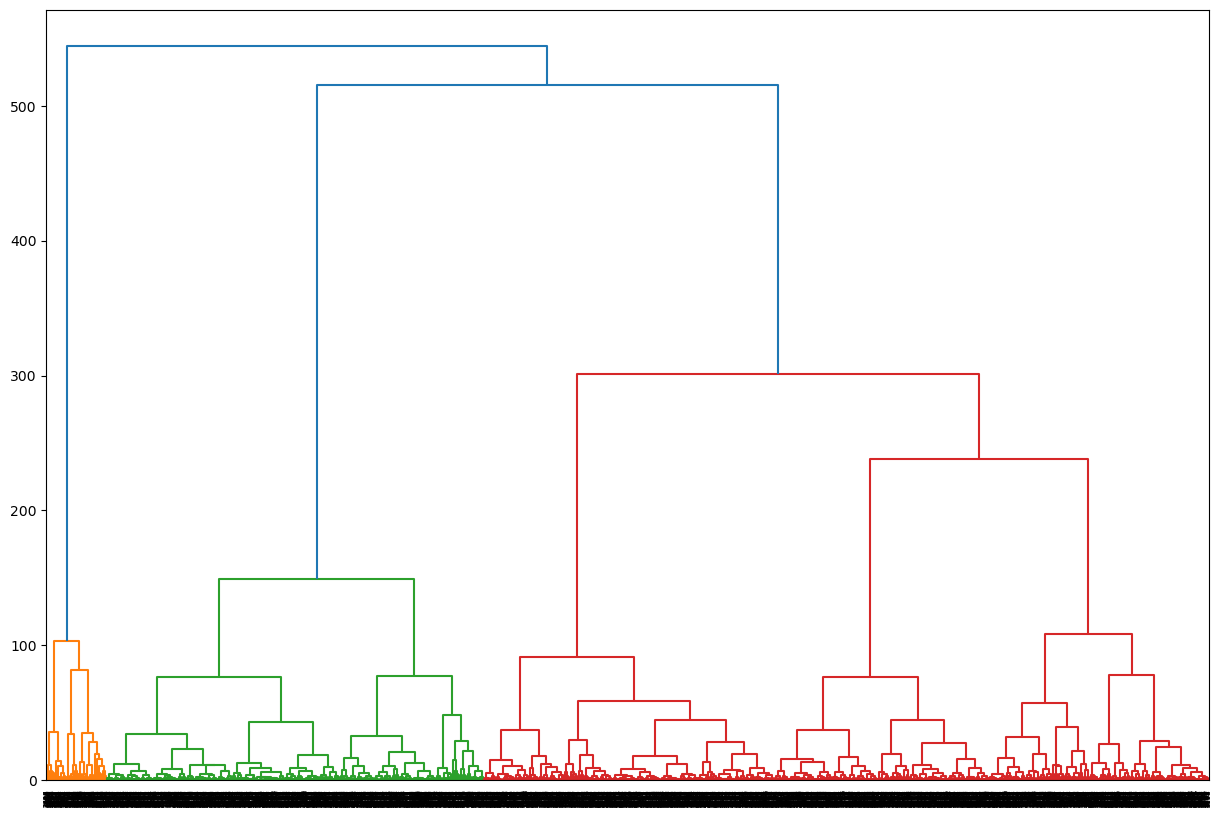

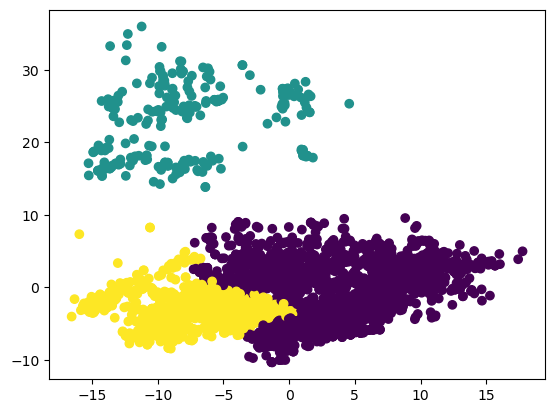

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Load the binary dataset
#data = pd.read_csv("binary_dataset.csv")

# Create a linkage matrix to perform hierarchical clustering
linkage_matrix = shc.linkage(principal_Df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
shc.dendrogram(linkage_matrix)
plt.show()

# Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(principal_Df)

# Assign the cluster labels to the original data
principal_Df['cluster_labels'] = agg_cluster.labels_

# Plot the data points colored by the cluster labels
plt.scatter(principal_Df.iloc[:,0], principal_Df.iloc[:,1], c=principal_Df['cluster_labels'])
plt.show()


In [19]:
data_a

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.590067
5794,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.621602
5795,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.387216
5796,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.200659


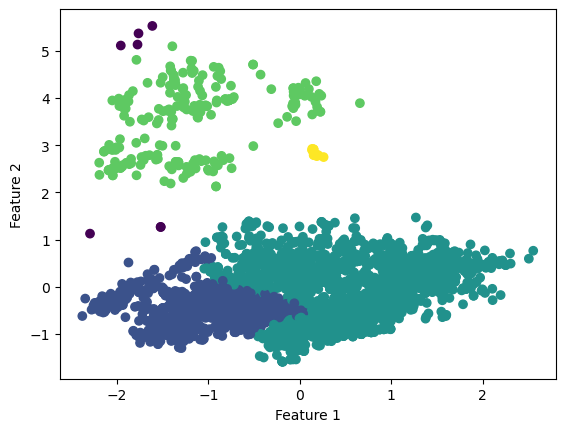

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load binary dataset
#data = pd.read_csv("binary_dataset.csv")

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(principal_Df)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(data_scaled)

# Plot the clusters
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()




Cluster Labels: [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0
 1 1]


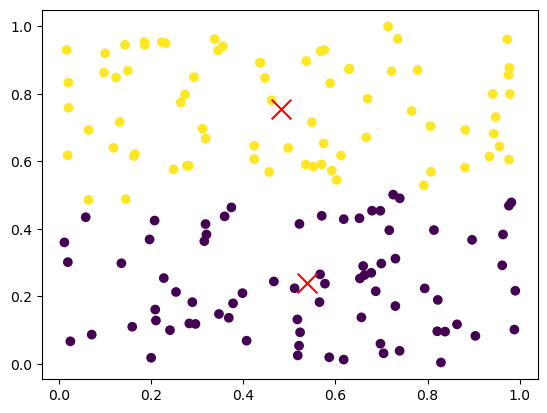

In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Load the binary data into a pandas dataframe
#df = pd.read_csv("binary_data.csv")

# Convert the dataframe to a numpy array
data = X

# Initialize the k-means model with the number of desired clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the binary data
kmeans.fit(data)

# Predict the cluster labels for each sample
labels = kmeans.predict(data)

# Print the cluster labels for each sample
print("Cluster Labels:", labels)

# Get the cluster labels
labels = kmeans.labels_

# Plot the data points with different colors for different clusters
plt.scatter(data[:, 0], data[:, 1], c=labels)

# Add the cluster center points
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200)

# Show the plot
plt.show()

In [14]:
data=data_a.drop(['pIC50'], axis=1)

In [15]:
k2model = KMeans(n_clusters = 3, random_state=42) #save the model

k2model.fit(data) #adjust all the data points exect fot the species

print(f'Inertia = {k2model.inertia_}')

print(f'Centroids (x,y) = \n {k2model.cluster_centers_}')

Inertia = 242246.2380102765
Centroids (x,y) = 
 [[1.         0.99672775 0.89725131 ... 0.         0.         0.        ]
 [1.         0.99815242 0.93025404 ... 0.         0.         0.        ]
 [0.99952494 0.99002375 0.84513064 ... 0.         0.         0.        ]]


In [18]:
import matplotlib.pyplot as plt

KeyError: 'petal length (cm)'

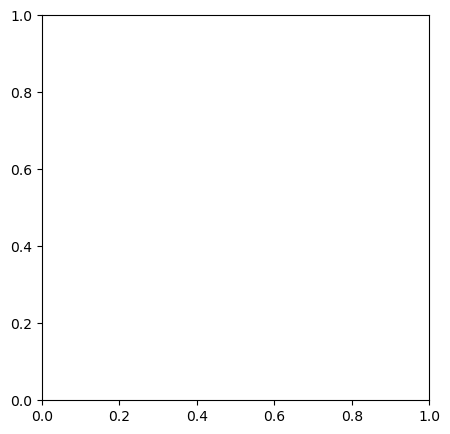

In [19]:
# graph
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

#setosa
ax.scatter(data[data.iloc[:,-1]==0]['petal length (cm)'],
            data[data.iloc[:,-1]==0][   'petal width (cm)'],
            c='k')

#versicolor
ax.scatter(data[data.iloc[:,-1]==1]['petal length (cm)'],
            data[data.iloc[:,-1]==1]['petal width (cm)'],
            c='r')

#virginica
ax.scatter(data[data.iloc[:,-1]==2]['petal length (cm)'],
            data[data.iloc[:,-1]==2]['petal width (cm)'],
            c='b')
ax.legend(['Setosa','Versicolor','Virginica'])

ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        'g*', markersize=30)            #plot the centroids

ax.set_title('K-Means clustering: Petal Length vs. Petal Width')
ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)')
f.tight_layout()
